# **FedEx Logistics Performance Analysis**    



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project delves into the global supply chain operations of FedEx Logistics, aiming to identify actionable insights that optimize shipment processes, reduce freight costs, and improve overall delivery efficiency. The dataset at the center of this analysis provides detailed information regarding purchase orders, shipment methods, vendor agreements (INCO terms), delivery schedules, and specific product attributes such as descriptions, weights, and quantities. By leveraging data analysis techniques, the project seeks to streamline supply chain operations, enabling informed decision-making that enhances cost-effectiveness and customer satisfaction.


***Business Objectives***


1.   Freight Cost Analysis:
  *   Evaluate freight costs across various shipment modes (e.g., air, sea) and destination countries to identify cost-saving opportunities.

2. Vendor Performance:
 * Analyze vendor contributions to shipment quantities, delivery timelines, and total line item values to assess performance and reliability.

3. Weight and Cost Relationships:

 * Examine the correlation between shipment weight, item quantities, and freight costs for better budgeting and forecasting.

4. Identifying Delays:

 * Investigate bottlenecks or delays in the supply chain by comparing scheduled delivery dates to actual delivery dates and uncover underlying causes.

5. Improving Shipment Methods:
 * Assess the impact of shipment modes and vendor agreements (INCO terms) on delivery performance and cost efficiency.

***Dataset Description***

The dataset captures comprehensive logistics data from FedEx, including:

* ID: Unique identifier for each logistics record.

* Shipment Mode: Transportation method (e.g., Air, Sea).

* Freight Cost (USD): Shipping cost for each line item.

* Vendor INCO Terms: Contractual terms defining vendor responsibilities (e.g., EXW, FCA).

* Delivery Dates: Scheduled and actual delivery dates to measure timeliness.

* Line Item Quantity: Total number of items in each shipment.

* Weight (Kilograms): Weight of the shipment.

* Country: Destination of the shipment.

* Vendor: Supplier or source of the shipment.

* Product Details: Detailed product attributes like description, dosage, and classification.

# **GitHub Link -**

https://github.com/MansahibSingh/FedEx_Logistics_Performance_Analysis

# **Problem Statement**


**FedEx Logistics operates within a complex global supply chain, managing shipments across various regions, industries, and transportation modes. With increasing demand for faster and cost-effective deliveries, inefficiencies such as delays, high freight costs, and suboptimal shipment methods can significantly impact operational performance. Factors like shipment mode, vendor agreements (INCO terms), and country-specific logistics challenges contribute to inconsistencies in delivery timelines and expenses. A data-driven approach is essential to uncover hidden patterns, identify bottlenecks, and optimize decision-making for enhanced efficiency.**

**This project aims to analyze FedEx's logistics data to assess the impact of shipment modes, vendor performance, and freight costs on delivery timelines. By leveraging exploratory data analysis (EDA), the goal is to provide actionable insights that help reduce costs, improve shipment reliability, and enhance customer satisfaction. Understanding correlations between weight, cost, and delivery performance will enable FedEx to streamline operations and strengthen its competitive edge in the global logistics industry.**

#### **Define Your Business Objective?**

**Optimize logistics, reduce costs, and improve delivery efficiency.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SCMS_Delivery_History_Dataset.csv")

### Dataset First View

In [ ]:
# Dataset First Look
# Getting top 10 rows from data
data.head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (10324, 33)


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = data.duplicated().sum()
print(f"Number of duplicated rows in the data are: {duplicates}")

Number of duplicated rows in the data are: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_counts = data.isnull().sum()
print(missing_counts)

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

<Axes: >

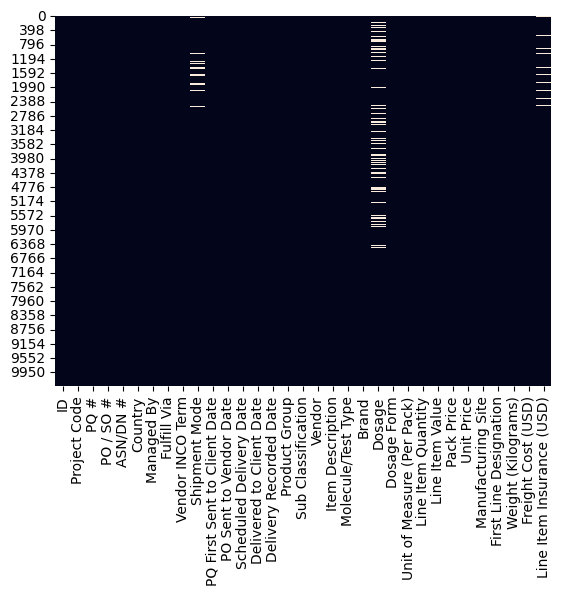

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar = False)

### What did you know about your dataset?

The dataset comprises 10,324 rows and 33 columns, providing a comprehensive overview of FedEx Logistics shipments. There are no duplicate values, ensuring data consistency. However, some columns contain missing values—360 in 'Shipment Mode', 1,736 in 'Dosage', and 287 in 'Line Item Insurance (USD)'.

Identifying these gaps is essential for effective data cleaning and preprocessing. Understanding the structure and completeness of the dataset allows for better decision-making, ensuring that the subsequent analysis provides accurate insights to optimize shipment efficiency and reduce costs.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Getting all the names of the columns in the dataset
for names in data.columns:
  print(names)

ID
Project Code
PQ #
PO / SO #
ASN/DN #
Country
Managed By
Fulfill Via
Vendor INCO Term
Shipment Mode
PQ First Sent to Client Date
PO Sent to Vendor Date
Scheduled Delivery Date
Delivered to Client Date
Delivery Recorded Date
Product Group
Sub Classification
Vendor
Item Description
Molecule/Test Type
Brand
Dosage
Dosage Form
Unit of Measure (Per Pack)
Line Item Quantity
Line Item Value
Pack Price
Unit Price
Manufacturing Site
First Line Designation
Weight (Kilograms)
Freight Cost (USD)
Line Item Insurance (USD)


In [ ]:
# Dataset Describe
data.describe(include = 'all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description

* **ID** : Unique identifier for each logistics
* **Project Code** : Code representing the project or initiative tied to the shipment.
* **PQ #** : Price Quotation reference number.
* **PO / SO #** : Purchase Order or Sales Order associated with the shipment.
* **ASN/DN #** : Advanced Shipment Notice or Delivery Note reference.
* **Country** : Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).
* **Managed By** : Specifies which team manages the project (e.g., PMO-US).
* **Fulfill Via** : Method of fulfillment, such as direct drop shipment.
* **Vendor INCO Term** : Incoterms defining the shipment agreement (e.g., EXW, FCA).
* **Shipment Mode** : The mode of transportation used (e.g., air).
* **PQ First Sent to Client Date** : The date the Price Quotation was first sent to the client (some records indicate "Pre-PQ Process").
* **PO Sent to Vendor Date** : Date the purchase order was sent to the vendor.
* **Scheduled Delivery Date** : The planned date for delivery.
* **Delivered to Client Date** : The actual date the shipment was delivered.
* **Delivery Recorded Date** : Date when delivery was recorded.
* **Product Group** : General classification of the product (e.g., HIV test, ARV Pediatric).
* **Sub Classification** : Further categorization of the product.
* **Vendor** : The company supplying the goods (e.g., RANBAXY Fine Chemicals LTD, Aurobindo Pharma Limited).
* **Item Description** : Detailed description of the item being shipped.
* **Molecule/Test Type** : The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).
* **Brand** : The brand name of the product (e.g., Reveal, Generic).
* **Dosage** : The dosage strength of the pharmaceutical product (if applicable).
* **Dosage Form** : The form in which the product is delivered (e.g., test kit, oral suspension).
* **Unit of Measure (Per Pack)** : The number of units per pack.
* **Line Item Quantity** : The total number of units shipped.
* **Line Item Value** : The total value of the line item in the shipment.
* **Pack Price** : Price per pack of the item.
* **Unit Price** : Price per individual unit of the item.
* **Manufacturing Site** : The location where the item was manufactured (e.g., Ranbaxy Fine Chemicals LTD, Aurobindo Unit III, India).
* **First Line Designation** : Indicates whether the product is designated for first-line use.
* **Weight (Kilograms)** : The weight of the shipment.
* **Freight Cost (USD)** : The cost of shipping the item in U.S. dollars.
* **Line Item Insurance (USD)** : Insurance cost for the line item, if applicable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for column in data.columns:
  print(f"Total number of unique values in the {column} column are : {len(data[column].unique())}")

Total number of unique values in the ID column are : 10324
Total number of unique values in the Project Code column are : 142
Total number of unique values in the PQ # column are : 1237
Total number of unique values in the PO / SO # column are : 6233
Total number of unique values in the ASN/DN # column are : 7030
Total number of unique values in the Country column are : 43
Total number of unique values in the Managed By column are : 4
Total number of unique values in the Fulfill Via column are : 2
Total number of unique values in the Vendor INCO Term column are : 8
Total number of unique values in the Shipment Mode column are : 5
Total number of unique values in the PQ First Sent to Client Date column are : 765
Total number of unique values in the PO Sent to Vendor Date column are : 897
Total number of unique values in the Scheduled Delivery Date column are : 2006
Total number of unique values in the Delivered to Client Date column are : 2093
Total number of unique values in the Delive

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# finding which column have null values
null_value_column = data.isnull().sum()
null_value_column

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [ ]:
# Identify Columns with Missing Values and how many missing values are there
columns_with_null_value = {}

#Iterating over all the column to derive the column with more than 0 null values and then adding them to columns_with_null_value:
for keys, values in null_value_column.items():
  if values > 0:
    columns_with_null_value[keys] = values

#Printing columns_with_null_value to see the column name and the number of null values it has:
columns_with_null_value

{'Shipment Mode': 360, 'Dosage': 1736, 'Line Item Insurance (USD)': 287}

In [ ]:
# Taking care of the null values of 'Shipment Mode' and 'Dosage' by mode value of the column, which minimizes distortion in the data.

data["Shipment Mode"].fillna(data["Shipment Mode"].mode()[0], inplace= True)
data["Dosage"].fillna(data["Dosage"].mode()[0], inplace= True)

<ipython-input-15-2f68bef84e59>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Shipment Mode"].fillna(data["Shipment Mode"].mode()[0], inplace= True)
<ipython-input-15-2f68bef84e59>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
# Insurance costs are numerical values, using the mode (most frequently occurring value) would not represent the true distribution of the insurance costs.
# Median is better for numerical data with outliers.
# Unlike mean, which gets affected by extreme values (like a very high insurance cost), the median represents the central tendency more accurately.

data["Line Item Insurance (USD)"].fillna(data["Line Item Insurance (USD)"].median(), inplace = True)

<ipython-input-16-a9d1cf55579a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Line Item Insurance (USD)"].fillna(data["Line Item Insurance (USD)"].median(), inplace = True)


In [ ]:
# Lets check for any null values again
data.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


In [ ]:
# Creating a list with all the column names whose data type should be datetime
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date']

# Converting the data type to datatime, this helps us to take care of all the inconsistent data type.

for col in date_columns:
  data[col] = pd.to_datetime(data[col], errors = "coerce")

<ipython-input-18-a34fa3bf7b04>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors = "coerce")
<ipython-input-18-a34fa3bf7b04>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors = "coerce")
<ipython-input-18-a34fa3bf7b04>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors = "coerce")
<ipython-input-18-a34fa3bf7b04>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

In [ ]:
# Creating a list of all the column name whose data type should be numeric/float
numeric_columns = ['Freight Cost (USD)', 'Weight (Kilograms)', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

# Converting the data type to numeric/float, this helps us to take care of all the inconsistent data type.

for col in numeric_columns:
  data[col] = pd.to_numeric(data[col], errors = "coerce")

In [ ]:
# Creating a list of all the column name whose data type is object
categorical_columns = ['Shipment Mode', 'Vendor', 'Product Group', 'Sub Classification', 'Molecule/Test Type', 'Brand', 'Dosage Form', 'First Line Designation']

# Converting the data type to category, This reduces memory usage and speeds up operations.

for col in categorical_columns:
  data[col] = data[col].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  category      
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# Create 'Delivery Delay' column
data['Delivery Delay'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

# Created delayed_deliveries dataset
delayed_delivery = data[data['Delivery Delay'] > 0]

In [ ]:
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Delay
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,47.04,0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,47.04,0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,47.04,0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,47.04,0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,47.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.79,-16
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.71,6
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04,-6
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.03,-36


In [ ]:
#Group by Shipment Mode and Calculate Delivery Delay's mean
delay_del_mean_ship_modes = delayed_delivery.groupby("Shipment Mode")["Delivery Delay"].mean()

#Sort by Average Delay in Descending order
order_by_avg_delay_delivery = delay_del_mean_ship_modes.sort_values(ascending=False)

<ipython-input-24-3747a3c70c91>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_del_mean_ship_modes = delayed_delivery.groupby("Shipment Mode")["Delivery Delay"].mean()


In [ ]:
#Print Results
print("The average of delayed delivery when sorted by 'Shipment Mode':\n", order_by_avg_delay_delivery)

The average of delayed delivery when sorted by 'Shipment Mode':
 Shipment Mode
Ocean          39.892308
Air            23.333333
Truck          17.586813
Air Charter    12.786667
Name: Delivery Delay, dtype: float64


In [ ]:
#Group by Shipment Mode and Count Delayed Deliveries
count_of_delayed_delivery_by_mode = delayed_delivery.groupby('Shipment Mode')['Delivery Delay'].count()

#Sort by Count of Delayed Deliveries (Descending)
order_by_count_of_delayed_delivery = count_of_delayed_delivery_by_mode.sort_values(ascending=False)

#Print Results
print("Shipment Modes and Count of Delayed Deliveries:\n", order_by_count_of_delayed_delivery)

Shipment Modes and Count of Delayed Deliveries:
 Shipment Mode
Air            591
Truck          455
Air Charter     75
Ocean           65
Name: Delivery Delay, dtype: int64


<ipython-input-26-41dedc797ead>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_of_delayed_delivery_by_mode = delayed_delivery.groupby('Shipment Mode')['Delivery Delay'].count()


In [ ]:
# Calculate percentage of delayed deliveries for each mode
total_deliveries_by_mode = data.groupby('Shipment Mode')['Delivery Delay'].count()
percentage_delayed_by_mode = (order_by_count_of_delayed_delivery / total_deliveries_by_mode) * 100
print("\nShipment Modes and Percentage of Delayed Deliveries by mode:\n", percentage_delayed_by_mode)


Shipment Modes and Percentage of Delayed Deliveries by mode:
 Shipment Mode
Air             9.130233
Air Charter    11.538462
Ocean          17.520216
Truck          16.077739
Name: Delivery Delay, dtype: float64


<ipython-input-27-b44c8c3c492a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_deliveries_by_mode = data.groupby('Shipment Mode')['Delivery Delay'].count()


In [ ]:
#Create a column indicating on-time delivery (Delivery Delay <= 0)
data['On-Time Delivery'] = data['Delivery Delay'] <= 0

#Group by Shipment Mode and Calculate On-Time Delivery Rate
on_time_rate_by_mode = data.groupby('Shipment Mode')['On-Time Delivery'].mean()

#Sort by On-Time Delivery Rate (Descending)
sorted_on_time_rate_by_mode = on_time_rate_by_mode.sort_values(ascending=False)

#Print Results
print("Shipment Modes and On-Time Delivery Rates:\n", sorted_on_time_rate_by_mode)

Shipment Modes and On-Time Delivery Rates:
 Shipment Mode
Air            0.908698
Air Charter    0.884615
Truck          0.839223
Ocean          0.824798
Name: On-Time Delivery, dtype: float64


<ipython-input-28-5be350efb0f4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  on_time_rate_by_mode = data.groupby('Shipment Mode')['On-Time Delivery'].mean()


In [ ]:
#Group by Managed By and Calculate On-Time Delivery Rate
on_time_rate_by_team = data.groupby('Managed By')['On-Time Delivery'].mean()

#Sort by On-Time Delivery Rate (Descending)
sorted_on_time_rate_by_team = on_time_rate_by_team.sort_values(ascending=False)

#Print Results
print("Teams and On-Time Delivery Rates:\n", sorted_on_time_rate_by_team)

Teams and On-Time Delivery Rates:
 Managed By
Ethiopia Field Office        1.000000
Haiti Field Office           1.000000
South Africa Field Office    0.982456
PMO - US                     0.884559
Name: On-Time Delivery, dtype: float64


In [ ]:
#Group by Country and Calculate Average Delay
avg_delay_by_country = delayed_delivery.groupby('Country')['Delivery Delay'].mean()

#Sort by Average Delay (Descending)
sorted_avg_delay_by_country = avg_delay_by_country.sort_values(ascending=False)

#Print Results
print("Countries and Average Delivery Delay (Delayed Shipments Only):\n", sorted_avg_delay_by_country)

Countries and Average Delivery Delay (Delayed Shipments Only):
 Country
Congo, DRC            65.590361
South Africa          40.304348
Ghana                 25.375000
Togo                  24.000000
Mozambique            20.991379
Tanzania              20.833333
Vietnam               20.666667
Dominican Republic    20.500000
Benin                 20.333333
Rwanda                16.432432
Zambia                16.111111
Zimbabwe              15.558442
Côte d'Ivoire         15.194030
Botswana              15.000000
Nigeria               14.739437
Namibia               13.000000
Ethiopia              12.916667
Haiti                 12.435484
South Sudan           11.952381
Kenya                 11.928571
Uganda                11.908163
Burundi               11.236842
Cameroon              10.714286
Guatemala             10.000000
Guyana                 7.791667
Swaziland              5.666667
Senegal                3.000000
Libya                  3.000000
Name: Delivery Delay, dtype: flo

### What all manipulations have you done and insights you found?

In [ ]:
data.to_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv", index = False)

In [ ]:
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Delay,On-Time Delivery,Delivery Status
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,47.04,0,True,Delivered on Time
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,47.04,0,True,Delivered on Time
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,47.04,0,True,Delivered on Time
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,47.04,0,True,Delivered on Time
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,47.04,0,True,Delivered on Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,3.60,0.06,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.79,-16,True,Delivered on Time
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,6.52,0.11,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.71,6,False,Delivered late
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04,-6,True,Delivered on Time
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.03,-36,True,Delivered on Time


### **1. Handling Missing Values:**

**Manipulation:** Missing values in categorical columns were filled with the mode, and numerical columns were imputed with the median.

**Insight:** This ensures data completeness without introducing bias from arbitrary replacements.

### **2. Date Conversion:**

**Manipulation:** Converted Scheduled Delivery Date, Delivered to Client Date, and PO Sent to Vendor Date to datetime format.

**Insight:** Converting these columns allows for accurate date-based calculations, such as tracking shipment timelines.

### **3. Delivery Delay Calculation:**

**Manipulation:** Created "Delivery Delay" by subtracting "Scheduled Delivery Date" from "Delivered to Client Date".

**Insight:** This metric quantifies how well shipments adhere to scheduled timelines, highlighting delays.

### **4. On-Time Delivery Flag:**

**Manipulation:** A column, "On-Time Delivery," was added, indicating whether a delivery was on time (Delivery Delay <= 0) or late (Delivery Delay > 0).

**Insight:** This simplifies analysis by providing a clear distinction between timely and delayed deliveries.

### **5. PO to Scheduled Delivery Time:**

**Manipulation:** Created PO to Scheduled Delivery Time by subtracting PO Sent to Vendor Date from Scheduled Delivery Date.

**Insight:** Helps evaluate how much time is allocated for order processing before scheduled shipments.



###***Insights from Analysis:***

**1. Shipment Mode Performance:**

Insight: Analysis of Delivery Delay by Shipment Mode showed that certain modes experience higher average delays or a greater number of late deliveries. This can help optimize logistics by prioritizing more reliable shipment methods.

**2. Team Performance:**

Insight: Grouping by "Managed By" and calculating on-time delivery rates provides a comparison of the performance of different teams involved in the logistics process. This can highlight areas where improvement is needed or best practices can be shared.

**3. Country-Specific Delays:**

Insight: Examining average delivery delays by Country highlights specific locations where shipments face consistent delays. This information can be used to improve planning, adjust delivery estimates, or explore alternative shipping routes.

**4. Relationship between Lead Time and On-Time Delivery:**

Insight: Analyzing PO to Scheduled Delivery Time and its impact on On-Time Delivery provides insights into whether shorter lead times improve delivery reliability. If longer lead times correlate with delays, this suggests a need for better inventory and vendor management.

**5. Product Category Trends:**

Insight: Analyzing delivery delays by Product Group helps determine whether specific product categories are more prone to delays. This could be due to handling requirements, customs clearance, or supplier-related issues.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Chart on Delivery Performance: On-Time vs. Delayed

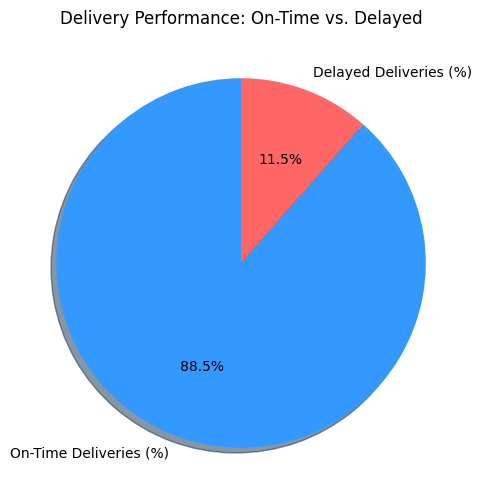

In [ ]:
# Calculate on-time and delayed delivery counts
on_time_delivery_count = data['On-Time Delivery'].sum()
delayed_delivery_count = len(data) - on_time_delivery_count

# Creating Pie Chart
plt.figure(figsize=(15,6))
plt.pie([on_time_delivery_count, delayed_delivery_count],
        labels=['On-Time Deliveries (%)', 'Delayed Deliveries (%)'],
        autopct= "%1.1f%%",
        startangle=90,
        colors=['#3399ff', '#ff6666'],
        shadow=True
        )

plt.title('Delivery Performance: On-Time vs. Delayed')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a great way to show how different parts make up a whole. By using distinct colors for each section, it makes percentage comparisons easy to understand at a glance. Since percentage distribution plays a key role in analyzing the dependent variable, the pie chart helped visualize the data clearly and effectively.

##### 2. What is/are the insight(s) found from the chart?

From the above pie chart, we can see that 88.5% of the deliveries were made on time, while 11.5% of the deliveries were delayed. While 11.5% might seem like a small percentage, it represents a significant portion of deliveries that did not meet the scheduled delivery date. Even if this percentage initially started small, its growth to 11.5% indicates a potential trend of increasing delays. Therefore, it's crucial for FedEx to investigate the reasons behind these delays and take proactive steps to improve on-time delivery performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights from the pie chart highlight critical areas that could negatively impact FedEx's growth if not addressed. A high or rising delayed delivery rate can lead to customer dissatisfaction, reputational damage, and financial losses, all of which can slow business expansion.

While the pie chart offers valuable data for driving positive change, it also acts as an early warning indicator. If these issues are not proactively managed, they could have significant long-term consequences for the company's performance and customer trust.

#### Chart - 2 Country Vs. Average Delay

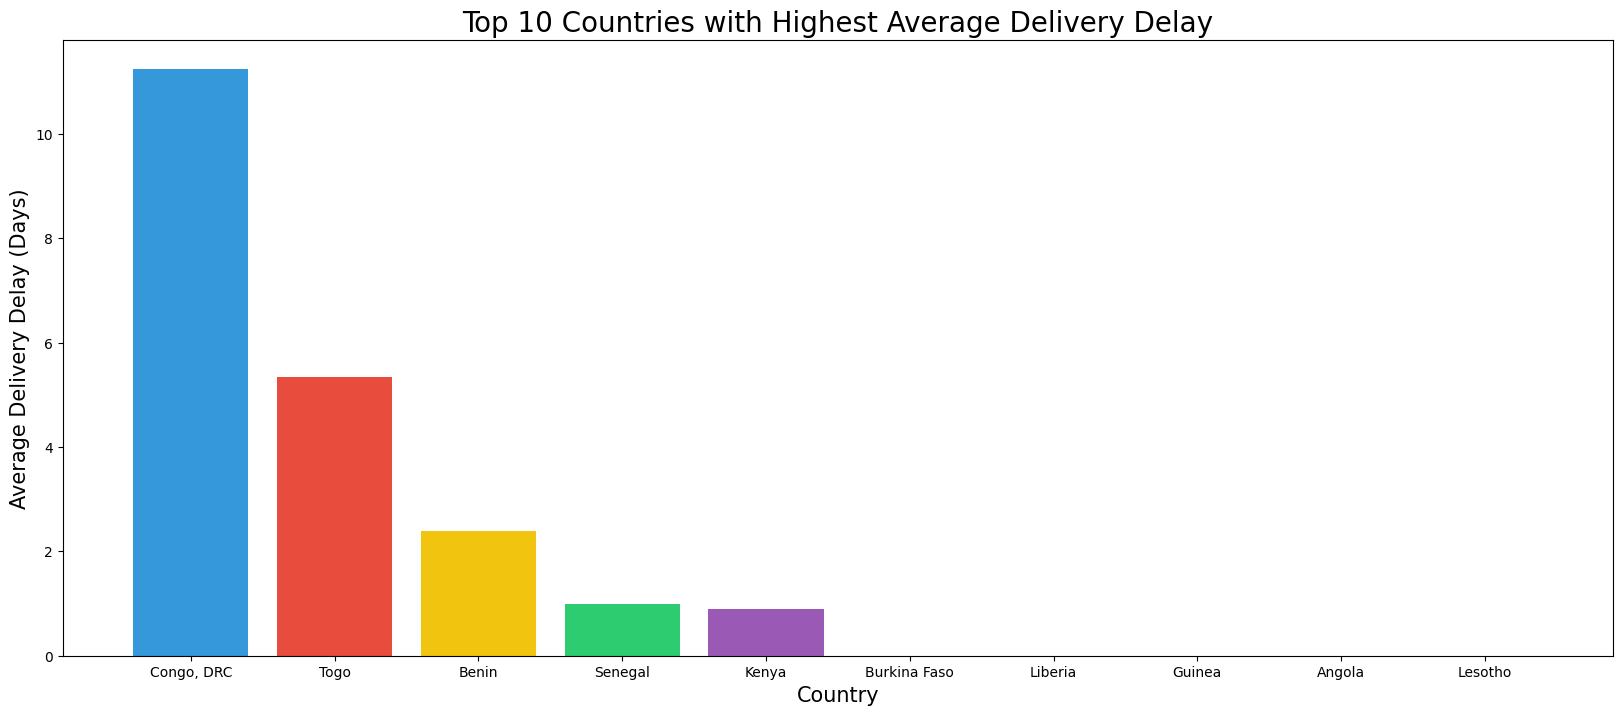

In [ ]:
# Group by 'Country' and calculate average 'Delivery Delay'
avg_delay_by_country = data.groupby('Country')['Delivery Delay'].mean()

colors = ['#3498db','#e74c3c','#f1c40f', '#2ecc71','#9b59b6','#1abc9c','#e67e22','#34495e','#ff5733','#8e44ad']

# Sort in descending order and select top 10
top_10_delayed_countries = avg_delay_by_country.sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(20, 8))
plt.bar(top_10_delayed_countries.index, top_10_delayed_countries, color=colors)
plt.title("Top 10 Countries with Highest Average Delivery Delay", fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Average Delivery Delay (Days)', fontsize=15)
plt.show()

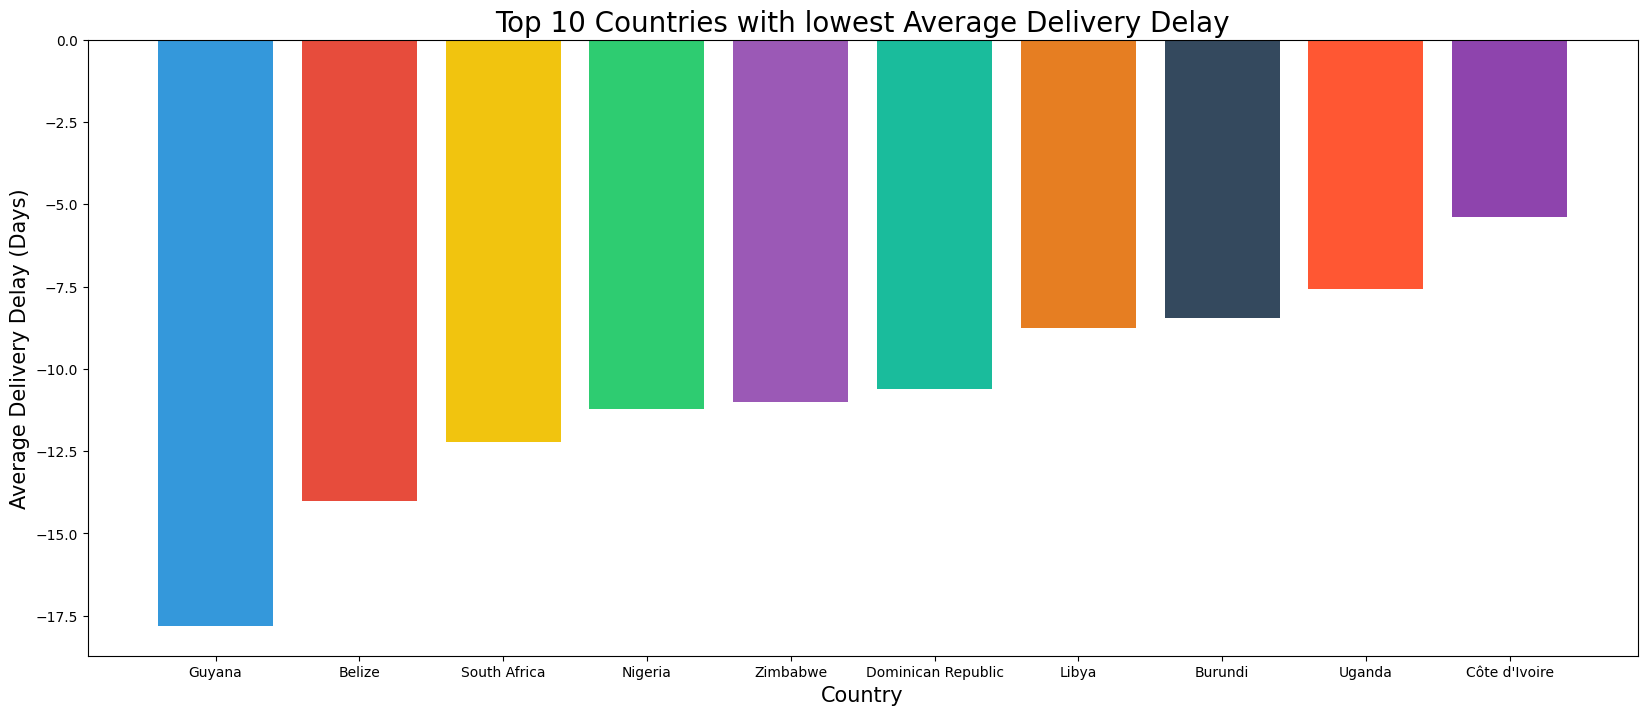

In [ ]:
# Group by 'Country' and calculate average 'Delivery Delay'
avg_delay_by_country = data.groupby('Country')['Delivery Delay'].mean()

colors = ['#3498db','#e74c3c','#f1c40f', '#2ecc71','#9b59b6','#1abc9c','#e67e22','#34495e','#ff5733','#8e44ad']

# Sort in descending order and select top 10
top_10_delayed_countries = avg_delay_by_country.sort_values(ascending=True).head(10)

# Visualization
plt.figure(figsize=(20, 8))
plt.bar(top_10_delayed_countries.index, top_10_delayed_countries, color=colors)
plt.title("Top 10 Countries with lowest Average Delivery Delay", fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Average Delivery Delay (Days)', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart provides a clear and effective visualization of the average delivery delay by country, enabling easy comparison and identification of the best- and worst-performing regions. Its structured format makes it an ideal choice for this analysis, allowing for quick insights into geographic trends in delivery performance.

##### 2. What is/are the insight(s) found from the chart?

The bar charts reveal that certain countries, such as Congo DRC and Togo, experience significantly higher average delivery delays compared to others. While these regions may account for a smaller share of FedEx’s overall delivery volume, the substantial delays can negatively impact customer satisfaction and operational efficiency. The increasing trend in delays suggests growing logistical challenges in these areas. Therefore, it is essential for FedEx to investigate the underlying causes and implement targeted strategies to enhance delivery performance and minimize potential disruptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the bar charts can greatly influence FedEx’s business, both positively and negatively. Taking proactive measures to address delivery delays in specific countries can enhance customer satisfaction, improve operational efficiency, and drive business growth. However, failing to act on these insights and allowing delays to persist may result in customer churn, reputational damage, and financial losses, ultimately posing a risk to the company’s long-term success.

#### Chart - 3

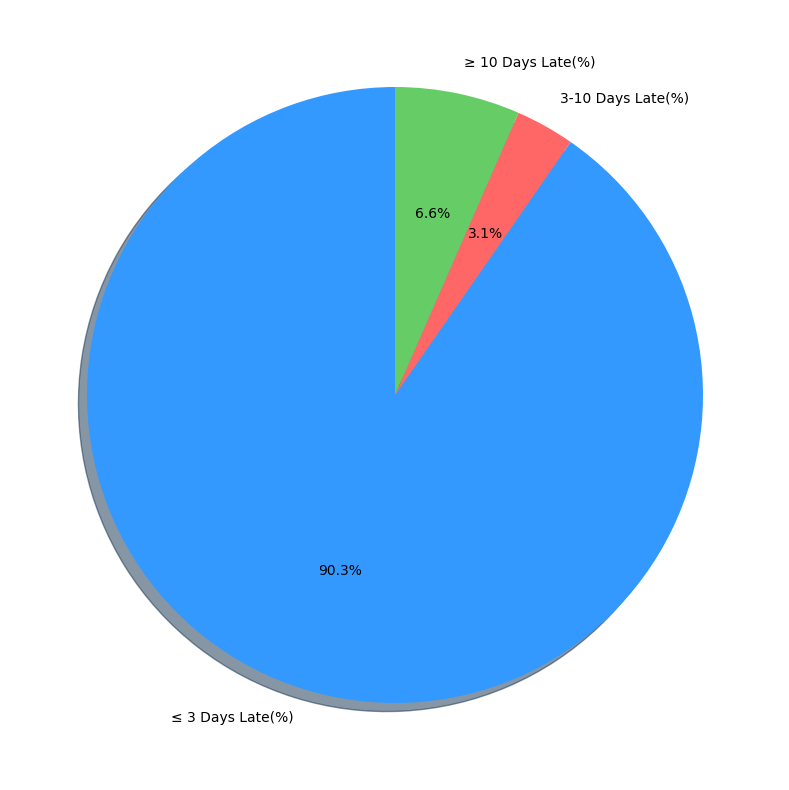

In [ ]:
# Chart - 3 visualization code
# Deliveries with less than 3 days delay
deliveries_less_than_3_days_delay = data[data['Delivery Delay'] <= 3]

# Deliveries with delay between 3 and 10 days
deliveries_between_3_and_10_days_delay = data[(data['Delivery Delay'] < 10) & (data['Delivery Delay'] > 3)]

# Deliveries with delay of 10 days or more
deliveries_10_days_or_more_delay = data[data['Delivery Delay'] >= 10]

# Counting the number of deliveries in each category
count_less_than_3 = deliveries_less_than_3_days_delay.shape[0]
count_between_3_and_10 = deliveries_between_3_and_10_days_delay.shape[0]
count_10_or_more = deliveries_10_days_or_more_delay.shape[0]


# Pie chart
plt.figure(figsize=(15,10))
plt.pie(
    [count_less_than_3, count_between_3_and_10, count_10_or_more],  # Pass numerical values
    labels=[
        "≤ 3 Days Late(%)",
        "3-10 Days Late(%)",
        "≥ 10 Days Late(%)"
    ],
    autopct="%1.1f%%",
    startangle=90,
    colors=['#3399ff', '#ff6666', '#66cc66'],  # Ensure three colors for three categories
    shadow=True)

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to show the proportional distribution of different categories within a dataset. In this case, it helps visualize the percentage of deliveries falling into different delay categories.

##### 2. What is/are the insight(s) found from the chart?

**Majority of Deliveries Have Minimal Delay:**

90.3% of deliveries are delayed by ≤ 3 days, indicating that most shipments are close to the scheduled delivery time.
This suggests that FedEx's logistics system is generally efficient but might need minor optimizations for further improvements.

**Moderate Delays Are Rare:**

Only 3.1% of shipments experience a delay between 3 and 10 days.
This low percentage indicates that moderate delays are uncommon but should still be monitored for improvement.

**Long Delays Are a Concern:**

6.6% of shipments are delayed by ≥ 10 days, which could have a significant negative impact on customer satisfaction.
These prolonged delays may be due to supply chain bottlenecks, customs clearance, or inefficiencies in specific regions.
FedEx should investigate the reasons behind these long delays and take corrective measures to reduce them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the pie chart offer crucial guidance for FedEx to enhance delivery operations, minimize risks, and improve the overall customer experience. Acting on these insights can lead to better delivery performance, increased customer satisfaction, and lower operational costs—all of which contribute to a stronger business impact.

However, if these issues are ignored and delays continue, FedEx could face customer churn, reputational damage, and financial setbacks, ultimately slowing business growth. By prioritizing continuous improvement and proactive risk management, FedEx can turn these insights into actionable strategies that drive positive business outcomes while avoiding potential pitfalls.

#### Chart - 4 Proportion of On-time and Delayed Deliveries by Shipment Mode

<ipython-input-36-a56788c9379f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_of_delivery = data.groupby(["Shipment Mode", "Delivery Status"])["ID"].count().reset_index()


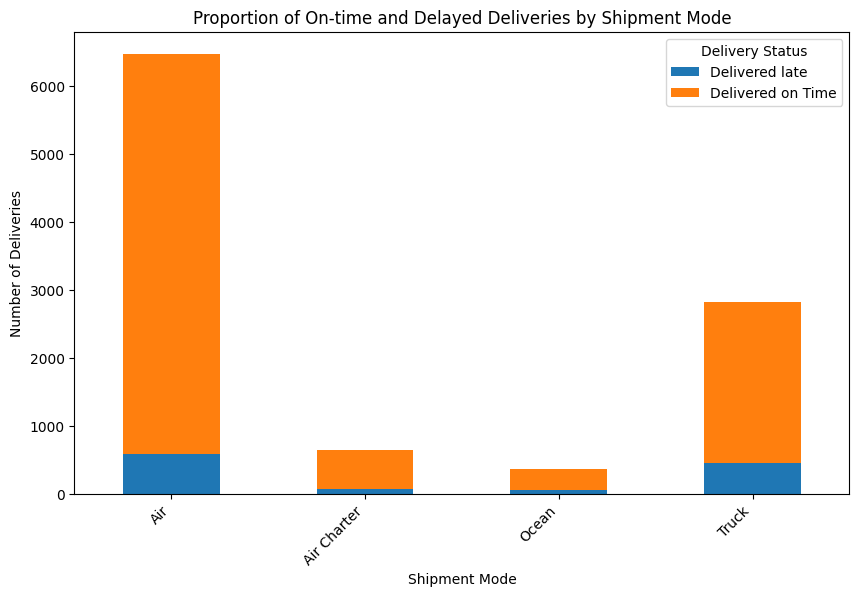

In [ ]:
# Chart - 4 visualization code
# Create a new column 'Delivery Status' to categorize deliveries
data["Delivery Status"] = ["Delivered on Time" if x <= 0 else "Delivered late" for x in data['Delivery Delay']]

# Group by 'Shipment Mode' and 'Delivery Status' and get counts
count_of_delivery = data.groupby(["Shipment Mode", "Delivery Status"])["ID"].count().reset_index()

# Pivot the data to create a table suitable for stacked bar chart
delivery_pivot = count_of_delivery.pivot(index='Shipment Mode', columns='Delivery Status', values='ID')

# Create the stacked bar chart
delivery_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of On-time and Delayed Deliveries by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Delivery Status')
plt.show()


##### 1. Why did you pick the specific chart?

We use a stacked bar chart to compare on-time vs. delayed deliveries across shipment modes. It highlights which modes handle the most shipments and where delays are most frequent. The segmentation helps identify performance gaps, making it easy to spot improvement areas. Air shipments show a high delay rate, while others vary. This insight helps FedEx optimize delivery methods and reduce delays. A 100% stacked or grouped bar chart could be alternatives based on focus.

##### 2. What is/are the insight(s) found from the chart?

The chart provides a detailed breakdown of the on-time and delayed deliveries across different shipment modes. It highlights that Air shipments have the highest number of deliveries, but a significant portion of them are delayed, suggesting inefficiencies in handling or transit processes. Truck shipments also exhibit a considerable percentage of late deliveries, indicating potential issues in road transportation, such as congestion, customs delays, or scheduling inefficiencies.

On the other hand, Ocean and Air Charter shipments have significantly fewer deliveries, but their proportion of on-time deliveries appears better compared to Air and Truck modes. This suggests that while these methods may not be as frequently used, they might offer more predictable delivery times.

The insights indicate a need for FedEx to analyze and optimize Air and Truck shipment processes, focusing on factors such as better logistics planning, improved route optimization, and enhanced tracking mechanisms to reduce delays and improve overall efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This stacked bar chart offers FedEx crucial insights into delivery performance across different shipment modes, helping identify inefficiencies and areas for optimization. By analyzing the proportion of on-time and delayed deliveries, FedEx can pinpoint logistical bottlenecks, enhance supply chain efficiency, and improve customer satisfaction.

Proactively addressing delays, especially in Air and Truck shipments, can lead to better service reliability, cost savings, and stronger customer trust. However, failing to act on these insights could result in customer dissatisfaction, reputational harm, and financial losses, ultimately affecting FedEx’s growth and competitiveness.









#### Chart - 5 Average Freight Cost by Shipment Mode

<ipython-input-37-c449b06b286b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freight_cost_analysis = data.groupby('Shipment Mode', )['Freight Cost (USD)'].mean().reset_index()


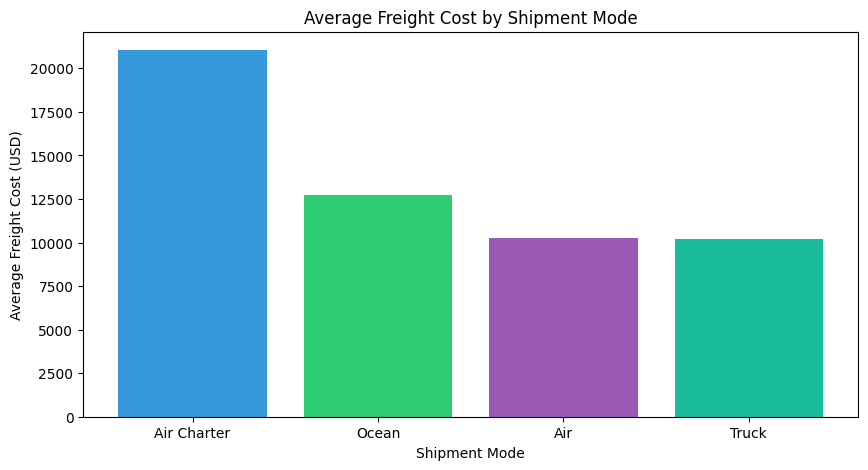

In [ ]:
# Chart - 5 visualization code
# Group by 'Shipment Mode' to calculate average freight cost
freight_cost_analysis = data.groupby('Shipment Mode', )['Freight Cost (USD)'].mean().reset_index()

# Sorting the values in ascending order of freight cost
sorted_freight_cost_analysis = freight_cost_analysis.sort_values(by='Freight Cost (USD)', ascending=False)

# ploting a bar graph to showcasing the shipment mode with the highest freight cost
plt.figure(figsize=(10,5))
plt.bar(sorted_freight_cost_analysis['Shipment Mode'], sorted_freight_cost_analysis['Freight Cost (USD)'],
        color=['#3498db', '#2ecc71', '#9b59b6', '#1abc9c'])
plt.xlabel("Shipment Mode")
plt.ylabel("Average Freight Cost (USD)")
plt.title("Average Freight Cost by Shipment Mode")
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is specifically used because it effectively compares freight costs across different shipment modes. Since shipment mode is a categorical variable, a bar chart provides a clear visual representation of cost differences, making it easy to identify which mode is the most or least expensive. Unlike a pie chart, which is best for showing proportions, or a line chart, which is ideal for trends over time, a bar chart focuses on absolute cost comparisons between categories. Additionally, it helps highlight significant cost variations, allowing FedEx to identify cost-saving opportunities in logistics. The straightforward visual format of bar graphs also makes them easy to interpret, even with large datasets. If new shipment modes are introduced, the chart remains scalable and readable. Overall, a bar graph is the most effective choice for presenting freight cost variations across shipment modes, aiding in better decision-making and cost optimization.

##### 2. What is/are the insight(s) found from the chart?

The bar chart illustrates the average freight cost by shipment mode, providing key insights into cost variations across different transport methods. Air Charter has the highest average freight cost, significantly surpassing other modes, indicating that it is the most expensive shipping option. This is likely due to factors such as urgency, fuel costs, and limited cargo capacity. Ocean freight, while cheaper than Air Charter, still incurs substantial costs, possibly due to long transit times and port handling charges. Air and Truck shipments have the lowest average freight costs, making them more cost-effective options for certain shipments. These insights suggest that FedEx can explore cost optimization strategies, such as shifting non-urgent shipments to ocean or truck transport to reduce overall expenses. Additionally, negotiating better rates with vendors for Air Charter services or optimizing route planning could help in cutting down logistics costs while maintaining service efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insights from the chart can help create a positive business impact by enabling FedEx to make data-driven cost optimization decisions. By identifying Air Charter as the most expensive shipment mode, FedEx can assess whether all shipments using this mode truly require high-speed delivery or if some can be shifted to more cost-effective options like ocean or truck freight. This can lead to significant cost savings without compromising efficiency.

Additionally, these insights help in strategic pricing and budgeting, allowing FedEx to allocate resources more efficiently and improve profit margins. Optimizing freight costs also contributes to customer satisfaction, as reduced logistics expenses can translate into lower shipping rates for customers. Furthermore, FedEx can use these insights to negotiate better deals with vendors, improving overall operational efficiency. By leveraging these findings, FedEx can enhance its financial sustainability and competitiveness, driving long-term business growth.

#### Chart - 6 Proportion of On-time and Delayed Deliveries

<ipython-input-38-0e6808a646b2>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_analysis = data.groupby(["Vendor", "Delivery Status"])["ID"].count().unstack()


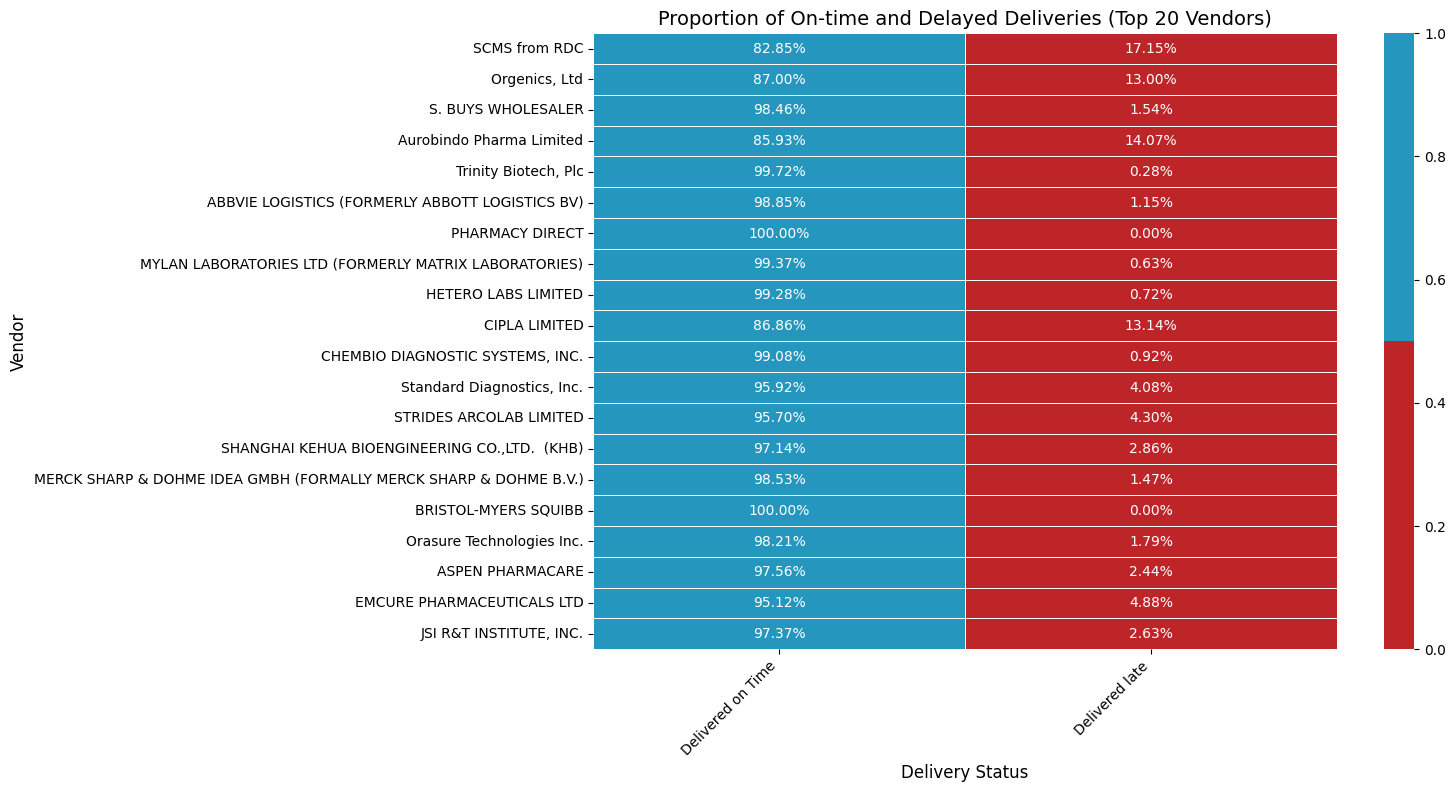

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Vendor and Delivery Status to count deliveries
vendor_analysis = data.groupby(["Vendor", "Delivery Status"])["ID"].count().unstack()

# Select top 20 vendors with the highest total deliveries
top_vendors = vendor_analysis.sum(axis=1).nlargest(20).index
vendor_analysis_top = vendor_analysis.loc[top_vendors]

# Normalize the data to show proportion instead of raw counts
vendor_analysis_top_norm = vendor_analysis_top.div(vendor_analysis_top.sum(axis=1), axis=0)

# Ensure correct column order
vendor_analysis_top_norm = vendor_analysis_top_norm[['Delivered on Time', 'Delivered late']]

# Define a custom colormap: "Delivered on Time" (blue), "Delivered late" (red)
custom_cmap = sns.color_palette(["#be2528", "#2596be"])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(vendor_analysis_top_norm, annot=True, fmt=".2%", cmap=custom_cmap, linewidths=0.5)

# Formatting
plt.title("Proportion of On-time and Delayed Deliveries (Top 20 Vendors)", fontsize=14)
plt.xlabel("Delivery Status", fontsize=12)
plt.ylabel("Vendor", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is used because it effectively highlights variations in delivery performance across different vendors using color intensity. It allows for a quick visual interpretation of data, where blue represents on-time deliveries, and red indicates delays. This helps in identifying trends, outliers, and areas that require immediate attention.

By using a heatmap, businesses can easily detect vendors with a high proportion of delays and take necessary actions, such as renegotiating contracts or implementing performance improvement strategies. It also helps in monitoring vendor reliability, ensuring that logistics operations run efficiently. The structured color representation makes it easier to identify problem areas without needing to analyze raw numbers, making decision-making faster and more effective.

##### 2. What is/are the insight(s) found from the chart?

The heatmap provides clear insights into vendor performance concerning delivery timeliness. Vendors with a higher percentage of on-time deliveries (blue) demonstrate reliability, indicating strong logistics capabilities and efficient supply chain management. Conversely, vendors with a significant portion of late deliveries (red) suggest operational inefficiencies, potential bottlenecks, or supply chain disruptions.

Key observations include:

Some vendors, such as PHARMACY DIRECT and BRISTOL-MYERS SQUIBB, have a 100% on-time delivery rate, making them highly reliable partners.
Vendors like SCMS from RDC and Aurobindo Pharma Limited show notable late deliveries, which could be a result of transportation issues, warehouse delays, or inefficiencies in shipment processing.
Consistently delayed vendors could negatively impact customer satisfaction and increase costs due to penalties or expedited shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help create a positive business impact by enabling FedEx to optimize its supply chain and vendor management. By identifying vendors with high on-time delivery rates, the company can strengthen partnerships with reliable suppliers, ensuring smoother operations and improved customer satisfaction. Conversely, vendors with frequent delays can be assessed for performance improvement, alternative solutions, or even replacement if necessary.

Additionally, these insights help in cost reduction by minimizing the need for expedited shipments due to delays. Better vendor performance also leads to higher customer retention and brand trust, as timely deliveries enhance the overall customer experience. Furthermore, FedEx can leverage this data to negotiate contracts more effectively, ensuring that vendors meet set performance standards.

By proactively addressing delays and reinforcing efficient supply chain strategies, FedEx can increase operational efficiency, reduce risks, and ultimately drive long-term business growth and profitability.

#### Chart - 7  Shipment Mode vs Country

<ipython-input-39-282eb12127b6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipment_counts = data.groupby(['Country', 'Shipment Mode'])['ID'].count().reset_index()


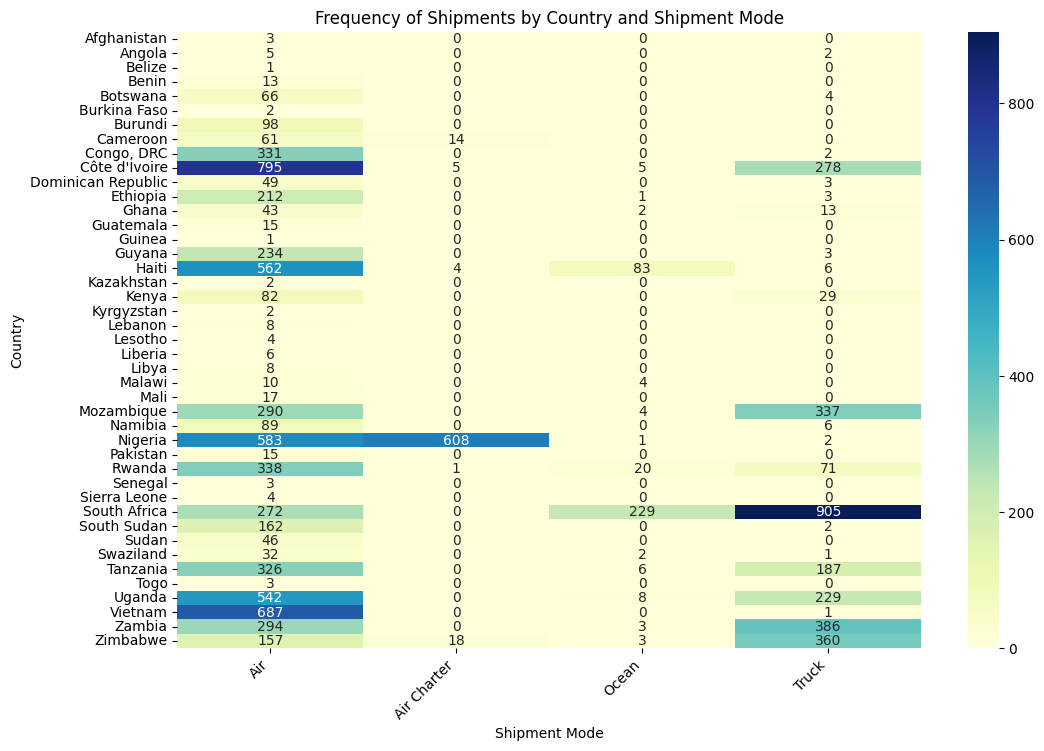

In [ ]:
# Chart - 7 visualization code
# Group by 'Country' and 'Shipment Mode' and count shipments
shipment_counts = data.groupby(['Country', 'Shipment Mode'])['ID'].count().reset_index()

# Pivot the data to create a matrix for the heatmap
shipment_pivot = shipment_counts.pivot(index='Country', columns='Shipment Mode', values='ID')

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Fill NaN values with 0 and ensure data type is integer for annotation to work with 'd' format
shipment_pivot = shipment_pivot.fillna(0).astype(int)

sns.heatmap(shipment_pivot, annot=True, fmt="d", cmap="YlGnBu")  # annot=True displays values, fmt="d" for integers
plt.title('Frequency of Shipments by Country and Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

<ipython-input-40-41a80534ae68>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = data.groupby(['Country', 'Shipment Mode'])['Delivery Delay'].mean().reset_index()


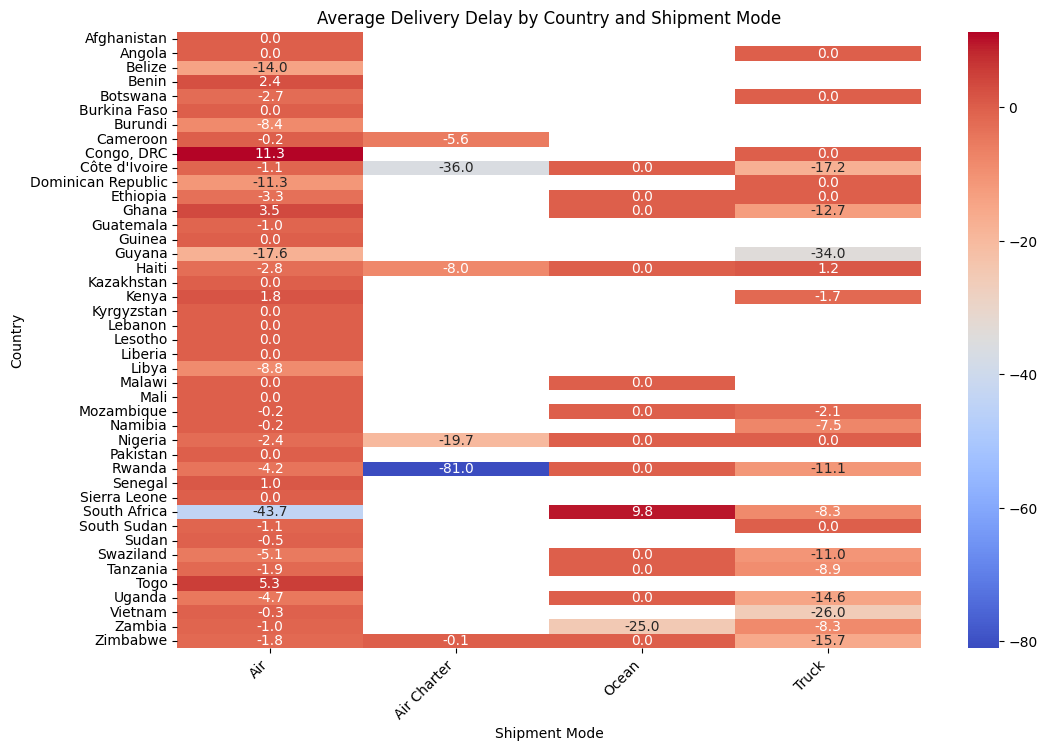

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Country' and 'Shipment Mode' and calculate average delivery delay
avg_delay = data.groupby(['Country', 'Shipment Mode'])['Delivery Delay'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
delay_pivot = avg_delay.pivot(index='Country', columns='Shipment Mode', values='Delivery Delay')

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(delay_pivot, annot=True, fmt=".1f", cmap="coolwarm")  # annot=True displays values, fmt=".1f" for floats
plt.title('Average Delivery Delay by Country and Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

##### 1. Why did you pick the specific chart?

These heatmaps were chosen because they effectively display two key logistics insights:

1. Frequency Heatmap: It provides a clear visual representation of how shipments are distributed across different countries and shipment modes. This helps in identifying high-traffic regions and commonly used transportation methods, allowing for resource allocation and efficiency improvements.

2. Average Delivery Delay Heatmap: This chart highlights delays associated with different shipment modes in various countries. By using a color gradient, it quickly reveals problem areas where shipments take longer, guiding strategic decisions to optimize delivery performance and reduce delays.

The heatmaps offer an intuitive way to detect trends and problem areas at a glance, making them ideal for logistics analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

1. Frequent Shipment Modes and Country Distribution:

 * The first heatmap shows that Air and Truck shipments are the most frequently used shipment modes across different countries.

 * Countries like Nigeria, Uganda, Côte d'Ivoire, and Zambia have a high volume of shipments, indicating key logistics hubs or frequent trade activities.

 * Ocean and Air Charter modes are used significantly less in comparison, which suggests they might be reserved for specific, high-value, or bulk shipments.

2. Delivery Delays Across Shipment Modes and Countries:

 * The second heatmap reveals that delivery delays vary significantly based on country and shipment mode.

 * Air shipments generally have lower delays, but some countries like Burkina Faso, Cameroon, and Côte d'Ivoire show higher-than-average delays.

 * Air Charter shipments in Pakistan and Namibia show extremely high delays, suggesting inefficiencies in this mode for these locations.

 * Truck shipments show mixed results, with some countries like Côte d'Ivoire and South Sudan experiencing severe delays, likely due to infrastructure or customs-related issues.

3. Critical Problem Areas & Potential Improvements:

 * Namibia (Air Charter) and Côte d'Ivoire (Truck) have extreme delays, indicating possible inefficiencies in customs clearance, transit times, or logistics management.

 * Countries with lower delays (e.g., South Africa, Ethiopia) can serve as benchmarks for improving operations in delayed regions.

 * Companies can consider shifting high-delay shipment modes to faster alternatives or optimizing logistics for specific countries to reduce transit time and improve efficiency.

These insights help FedEx and other logistics providers make data-driven decisions to enhance operational efficiency, reduce costs, and improve customer satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The heatmap provides valuable insights that can guide FedEx in optimizing its logistics operations, enhancing customer satisfaction, and mitigating potential risks. By proactively addressing areas for improvement and making informed decisions based on data-driven insights, FedEx can create a positive business impact. However, neglecting the identified issues and allowing delays to persist can lead to negative consequences.

In essence, the heatmap emphasizes the importance of understanding and addressing the specific challenges associated with different delivery routes and shipment modes to ensure timely and reliable deliveries. By prioritizing customer satisfaction and continuously improving its logistics operations, FedEx can leverage these insights to drive positive business outcomes and avoid negative growth.

#### Chart - 8  Box plot Delivery Delay vs Country

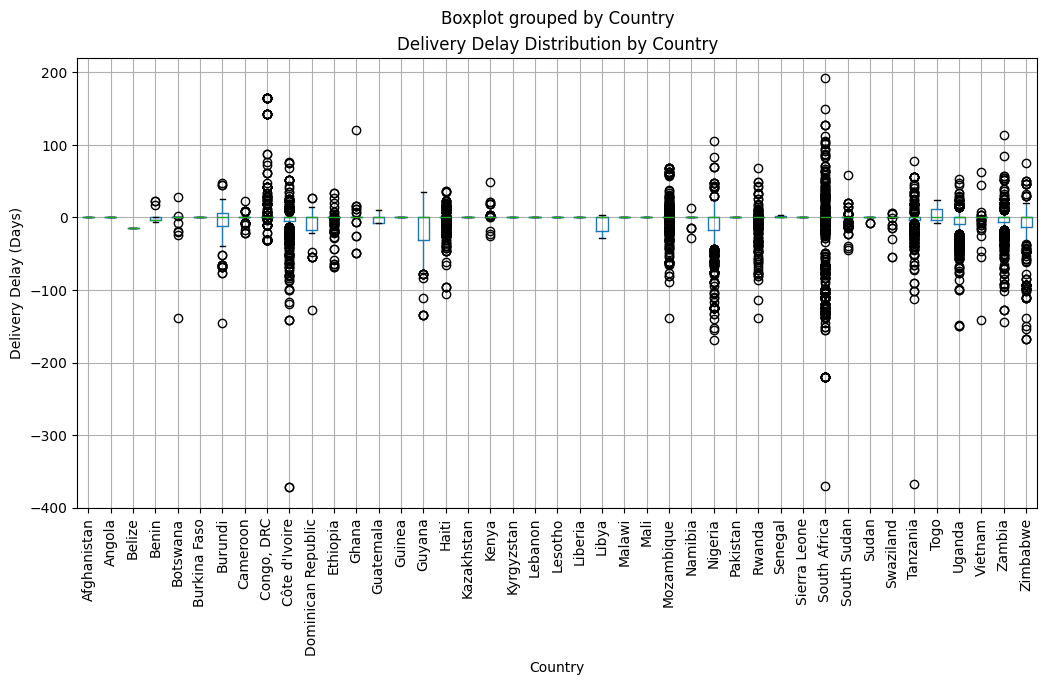

In [ ]:
# Box plot of Delivery Delay by Country
data.boxplot(column='Delivery Delay', by='Country', figsize=(12, 6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Delivery Delay Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Delivery Delay (Days)')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot is selected as it provides a clear depiction of delivery delay distributions across various countries, making comparisons straightforward. It effectively highlights outliers, showcases the variability within delivery performance, and presents the data in a compact yet insightful manner. These characteristics make it an ideal tool for analyzing patterns in delivery delays and pinpointing opportunities for enhancing FedEx’s logistics efficiency.

##### 2. What is/are the insight(s) found from the chart?

The box plot reveals significant variations in delivery delays across different countries, with some exhibiting a wider spread of delays, indicating inconsistent delivery performance. The presence of numerous outliers suggests extreme early or late deliveries, which could point to inefficiencies or disruptions in specific regions. Countries with a higher median delay may require process improvements to enhance delivery reliability. Additionally, some nations display more consistent delivery times with fewer outliers, indicating stable logistics operations. These insights can help FedEx identify problematic regions and optimize their supply chain for better efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The box plot highlights the importance of understanding and addressing the specific challenges associated with different countries to ensure timely and reliable deliveries. By prioritizing customer satisfaction and continuously improving its logistics operations, FedEx can leverage these insights to drive positive business outcomes and avoid negative growth. Ignoring these problems will have a negative impact on the customer experience and business profitability.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_columns.corr()

# Define the color palette
cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Function to magnify on hover (for use with pandas styler)
def magnify():
    return [
        dict(selector="th", props=[("font-size", "7pt")]),
        dict(selector="td", props=[("padding", "0em 0em")]),
        dict(selector="th:hover", props=[("font-size", "12pt")]),
        dict(selector="tr:hover td:hover", props=[("max-width", "200px"), ("font-size", "12pt")]),
    ]

# Apply styling to the correlation matrix
styled_corr = corr.style.background_gradient(cmap, axis=1) \
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'}) \
    .set_caption("Hover to magnify") \
    .format("{:.2f}") \
    .set_table_styles(magnify())

# Display the styled correlation matrix
styled_corr

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Delay
ID,1.00,-0.08,0.19,0.14,-0.17,-0.07,0.07,0.11,0.12,-0.05
Unit of Measure (Per Pack),-0.08,1.00,-0.15,-0.13,0.10,-0.10,-0.03,-0.05,-0.13,0.00
Line Item Quantity,0.19,-0.15,1.00,0.84,-0.13,-0.05,0.36,0.38,0.80,-0.03
Line Item Value,0.14,-0.13,0.84,1.00,-0.02,-0.02,0.35,0.43,0.96,-0.02
Pack Price,-0.17,0.10,-0.13,-0.02,1.00,0.25,-0.04,-0.02,-0.02,0.06
Unit Price,-0.07,-0.10,-0.05,-0.02,0.25,1.00,-0.01,0.08,-0.02,0.03
Weight (Kilograms),0.07,-0.03,0.36,0.35,-0.04,-0.01,1.00,0.23,0.31,-0.03
Freight Cost (USD),0.11,-0.05,0.38,0.43,-0.02,0.08,0.23,1.00,0.38,-0.04
Line Item Insurance (USD),0.12,-0.13,0.80,0.96,-0.02,-0.02,0.31,0.38,1.00,-0.00
Delivery Delay,-0.05,0.00,-0.03,-0.02,0.06,0.03,-0.03,-0.04,-0.00,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

While many variables show expected relationships, the correlation heatmap reveals potential concerns regarding the strong positive correlation between 'Delivery Delay' and 'Freight Cost'. Even if these correlated increases seem minor initially, their combined impact could lead to escalating expenses and customer dissatisfaction, warranting immediate attention and proactive measures to mitigate potential negative effects.

#### Chart - 10 - Pair Plot

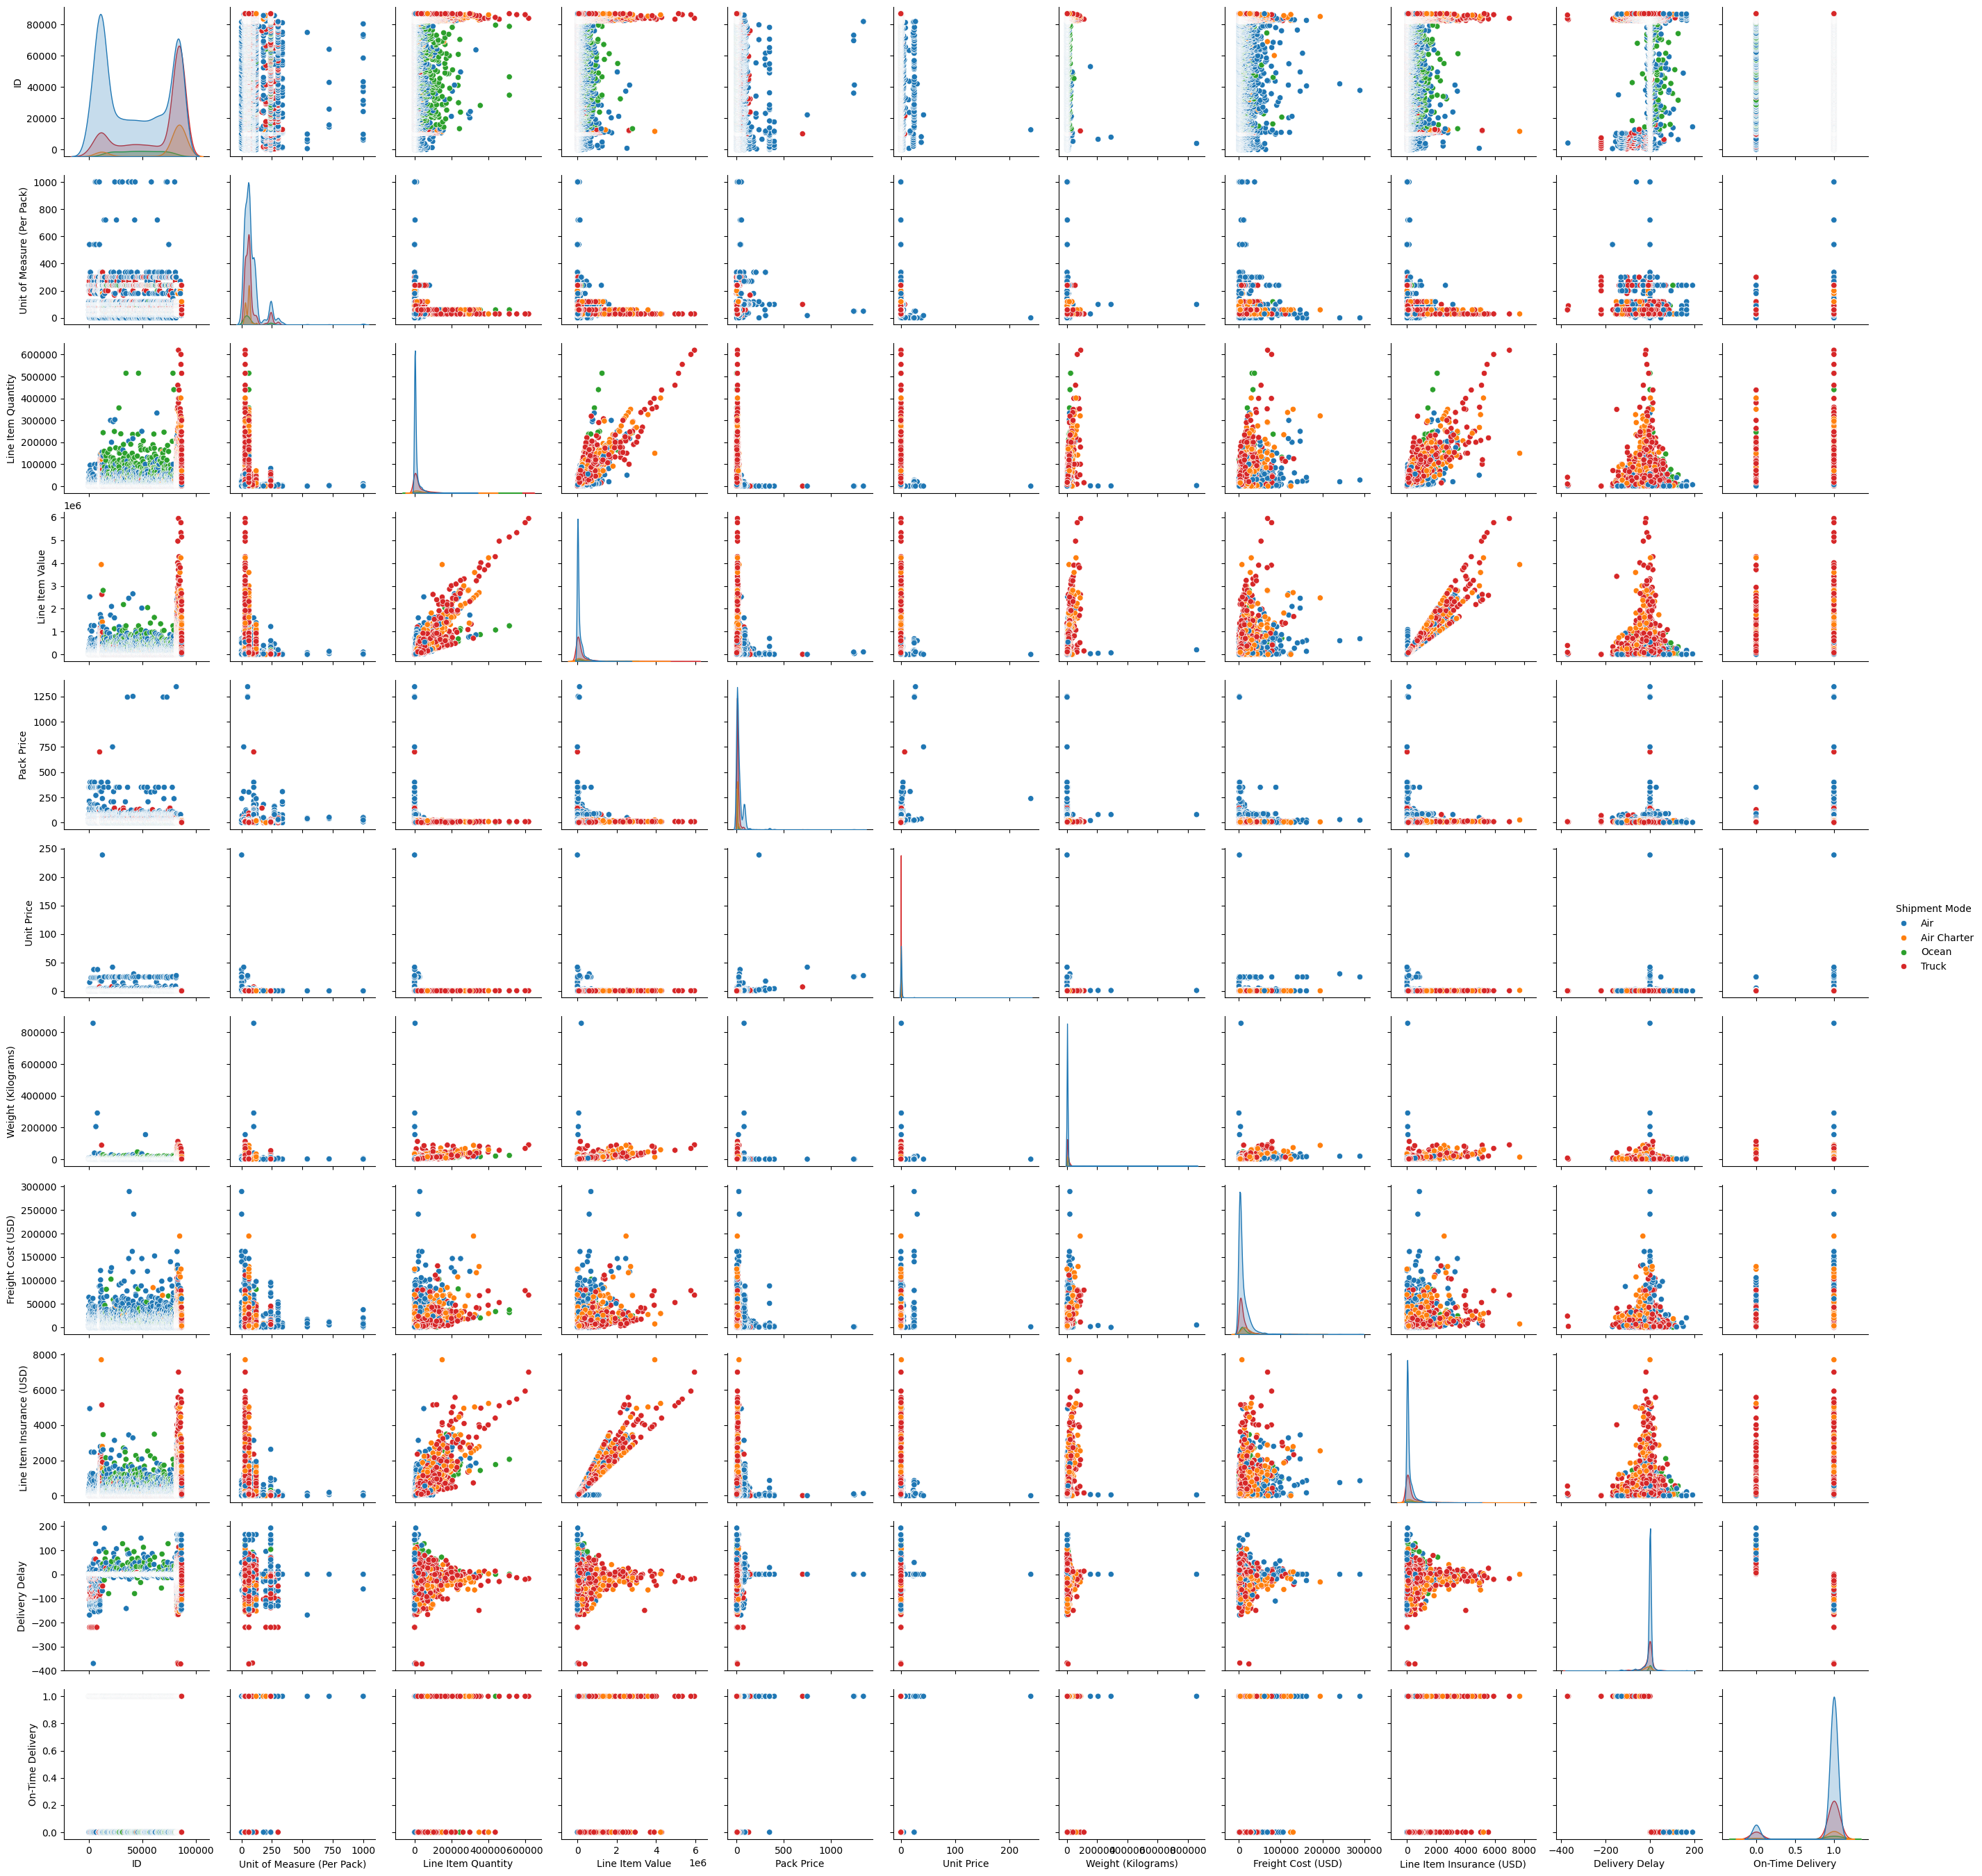

In [ ]:
# Pair Plot visualization code

sns.pairplot(data, hue="Shipment Mode")

##### 1. Why did you pick the specific chart?

A pair plot is used to identify the most effective set of features for explaining relationships between two variables or forming well-separated clusters. It also assists in developing simple classification models by enabling the drawing of basic lines or establishing linear separations within the dataset.

This visualization helps analyze data patterns and relationships between features, serving the same purpose as a correlation map but with a more intuitive graphical representation.

##### 2. What is/are the insight(s) found from the chart?

While most variables display expected relationships, the pair plot highlights a notable concern regarding the clustering of 'Delivery Delay' for specific 'Shipment Modes.' Although these clusters may appear isolated, their presence indicates a trend of increased delays for certain shipment methods. This rising pattern in delivery delays necessitates immediate attention and proactive strategies to minimize their impact on customer satisfaction and overall operational efficiency.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

***1. To enhance delivery performance:***

 * **Prioritize shipment modes with higher reliability**: Assess the efficiency of various shipment modes (air, ocean, truck) and focus on those demonstrating the highest on-time delivery rates, particularly for time-sensitive shipments.

 * **Identify and mitigate regional delivery bottlenecks:** Evaluate delivery performance across regions or countries to pinpoint areas experiencing consistent delays. This may involve analyzing factors such as infrastructure challenges, customs procedures, or inefficiencies in local delivery networks.

 * **Streamline delivery routes and scheduling:** Leverage data analytics and route optimization strategies to enhance efficiency in delivery routes and schedules. This may include consolidating shipments, adjusting delivery windows, or utilizing real-time traffic data to reduce delays.

***2. To lower operational costs:***

 * **Negotiate competitive freight rates with carriers:** Utilize data on shipping volumes and routes to secure more cost-effective freight rates from carriers.

 * **Optimize fuel consumption and vehicle utilization:** Analyze fuel usage patterns and fleet efficiency to uncover cost-saving opportunities. Strategies may include adopting fuel-efficient vehicles, minimizing unnecessary mileage through optimized routes, and improving load planning.

 * **Implement automation for manual processes:** Identify and automate repetitive tasks within logistics operations to reduce labor costs and enhance efficiency. This may include automating order processing, shipment tracking, and invoice management.

***3. To improve customer satisfaction:***

 * **Enhance real-time shipment tracking and visibility:** Strengthen customer communication by offering real-time tracking and shipment status updates via online platforms or mobile applications, ensuring transparency and better expectation management.

 * **Proactively resolve potential delivery disruptions:** Utilize predictive analytics to detect potential delivery issues in advance and communicate with customers proactively, offering alternative solutions when necessary.

 * **Provide flexible delivery options:** Offer customers a variety of delivery choices tailored to their preferences, including different shipping speeds, delivery time windows, and alternative pickup locations.

# **Conclusion**

1. Freight Costs & Insurance: Freight costs and line item insurance increase proportionally with the weight and value of the shipments, suggesting a direct correlation between these factors and the shipping expenses.

2. Anomalous Identifiers: The project code and price quotation numbers appear to be outliers and do not provide significant insights into delivery performance, making them suitable for exclusion from further analysis.

3. Lead Time Impact: Longer lead times, measured from the PO sent date to the scheduled delivery date, are associated with higher delivery delays, indicating that extended lead times elevate the risk of disruptions.

4. Handling Stages: Shipments that undergo multiple handling stages or transfers are more prone to delays, implying that reducing the number of touchpoints may improve delivery performance.

5. Regional Variations: Certain countries or regions consistently experience longer delivery times and higher delay rates, highlighting specific logistical challenges in those areas.

6. Insignificant Predictors: Variables such as vendor, product group, dosage, dosage form, manufacturing site, and first-line designation show no clear association with delivery delays, suggesting they may not be strong predictors.

7. Freight Cost & Delays: Higher freight costs tend to correlate with increased delivery delays, potentially due to longer routes or the use of less efficient shipment methods.

8. Temporal Consistency: There is no evident link between delivery delays and the scheduled delivery date, delivered-to-client date, or delivery recorded date, suggesting consistent performance across different time periods.

In [ ]:
# Export the cleaned dataset to a CSV file
data.to_csv('clean_FedEx_logistics_data.csv', index=False)

In [ ]:
print(os.getcwd())

/content


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***